---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span
$$

---

---
# 8.2 Orthogonal Polynomials and (Continuous) least squares approximation
---

## Recall

In the previous chapter we approximated a function $f(x)$ over an interval $[a,b]$ by interpolating points $\set{(x_i,f(x_i))}_{i=0}^n$ by either a polynomial $p_n(x)$ having degree at most $n$, or by a piecewise polynomial $p(x)$.

The **error of the interpolation (approximation)** was measured using the **infinity-norm**:

$$
\norm{f - p}_\infty := \max_{x \in [a,b]} \abs{f(x) - p(x)}.$$

We found valid upper bounds on this error, such as 

$$\norm{f - p_n}_\infty \leq \frac{\norm{f^{(n+1)}}_\infty}{(n+1)!} \max_{x \in [a,b]} \prod_{i=0}^n \abs{x-x_i},$$

for the unique polynomial $p_n(x)$ having degree at most $n$ interpolating $(x_0,f(x_0)), \ldots, (x_n,f(x_n))$.


## Best approximation

We now will look at minimizing the **approximation error** directly. 


> ## Definition (linearly dependent):
>The set of functions $\{\phi_0, \ldots, \phi_n\}$ is said to be **linearly independent** on [a, b] if, whenever
>$$c_0\phi_0(x)+c_1\phi_1(x)+\cdots+c_n\phi_n(x)=0,$$ for all $x\in[a,b]$,
>we have $c_0 = c_1 = \cdots = c_n = 0$. Otherwise the set of functions is said to be **linearly dependent**.


Given a set of **linearly independent** functions $\set{\phi_j(x)}_{j=0}^n$, we want to find a function 

$$p(x) = \sum_{j=0}^n c_j \phi_j(x)$$

that minimizes the error $\norm{f - p}$, where $\norm{\cdot}$ is a **function norm**.

## Function norms

Let $\norm{\cdot}$ be a **norm** for $f \in C[a,b]$.

Then $\norm{\cdot}$ is a function that takes an input $f$ and returns a real number.

A norm $\norm{\cdot}$ for functions must satisfy:

1. $\norm{f} \geq 0$, for all functions $f$, and $\norm{f} = 0$ if and only if $f(x) = 0$, for all $x \in [a,b]$;

2. $\norm{\alpha f} = \abs{\alpha} \norm{f}$, for all $\alpha \in \mathbb{R}$;

3. $\norm{f+g} \leq \norm{f} + \norm{g}$ for all $f, g \in C[a,b]$.

## Norm 2 in terms of the inner-product

We will define the $L_2$ norm in terms of the inner-product.

The **inner-product** of two functions $f,g \in C[a,b]$ is defined as

$$\ip{f}{g} := \int_a^b f(x) g(x)\,dx.$$

Note that we can use the inner-product to talk about the **angle** between functions. For example, functions $f$ and $g$ are said to be **orthogonal** if $\ip{f}{g} = 0$.

The $L_2$ norm of a function $f \in C[a,b]$ is defined as

$$\norm{f}_2 := \sqrt{\ip{f}{f}} = \paren{\int_a^b \brack{f(x)}^2 dx}^{\frac12}$$

In this chapter, we will consider methods for minimizing 
$$\norm{f-p}^2_2=\int_a^b \brack{f(x)-p(x)}^2 dx,$$ also known as the **continuous least-squares problem**.

## Solving the continuous least-squares problem

We want to find the coefficients $c_0,\ldots,c_n$ such that 

$$p(x) = \sum_{j=0}^n c_j \phi_j(x)$$

minimizes $\norm{f-p}_2$ over all functions $p \in \span\set{\phi_0,\ldots,\phi_n}$.

Equivalently, we can minimize 

$$
\begin{align}
E_2(c_0,\ldots,c_n)&=\norm{f-p}_2^2\\
 & = \ip{f-p}{f-p} \\
& = \ip{f}{f} - 2\ip{f}{p} + \ip{p}{p} \\
& = \ip{f}{f} - 2\ip{f}{\sum_{j=0}^n c_j \phi_j} + \ip{\sum_{j=0}^n c_j \phi_j}{\sum_{j=0}^n c_j \phi_j} \\
& = \ip{f}{f} - 2\sum_{j=0}^n c_j \ip{f}{\phi_j} + \sum_{j=0}^n \sum_{k=0}^n c_j c_k \ip{\phi_j}{\phi_k} \\
& = \ip{f}{f} - 2b^Tc + c^T B c, \\
\end{align}
$$

where $B \in \mathbb{R}^{(n+1) \times (n+1)}$ and $b, c \in \mathbb{R}^{n+1}$ are defined as

$$
B := 
\begin{bmatrix}
\ip{\phi_0}{\phi_0} & \cdots & \ip{\phi_0}{\phi_n} \\
\vdots & \ddots & \vdots\\
\ip{\phi_n}{\phi_0} & \cdots & \ip{\phi_n}{\phi_n} \\
\end{bmatrix},
\qquad
b := 
\begin{bmatrix}
\ip{f}{\phi_0}\\
\vdots\\
\ip{f}{\phi_n}\\
\end{bmatrix},
\qquad
c := 
\begin{bmatrix}
c_0 \\
\vdots\\
c_n \\
\end{bmatrix}.
$$

## The normal equations

Let $E_2 \colon \mathbb{R}^{n+1} \to \mathbb{R}$ be defined as

$$E_2(c) = c^T B c - 2b^Tc + \ip{f}{f}.$$

So we want to find $c^* \in \mathbb{R}^{n+1}$ such that

$$E_2(c^*) \leq E_2(c), \quad \forall c \in \mathbb{R}^{n+1}.$$

From multivariable calculus, we know that any **local minimizer** $c^*$ much satisfy $\nabla E_2(c^*) = 0$.

It is not too difficult to show that 

$$\nabla E_2(c) = 2Bc - 2b.$$

Therefore, we just need to solve the following linear system:

$$Bc^* = b.$$ Or equivalently, the solution of the **(continuous) least-squares problem** coincides with the solution of the following linear system:

$$\begin{bmatrix}
\ip{\phi_0}{\phi_0} & \ip{\phi_0}{\phi_1} & \cdots & \ip{\phi_0}{\phi_n} \\
\ip{\phi_1}{\phi_0} & \ip{\phi_1}{\phi_1} &\cdots & \ip{\phi_1}{\phi_n} \\
\vdots & \ddots & \vdots\\
\ip{\phi_n}{\phi_0} & \ip{\phi_n}{\phi_1} & \cdots & \ip{\phi_n}{\phi_n} \\
\end{bmatrix}\begin{bmatrix}
c_0 \\
c_1 \\
\vdots\\
c_n \\
\end{bmatrix}=
\begin{bmatrix}
\ip{f}{\phi_0}\\
\ip{f}{\phi_1}\\
\vdots\\
\ip{f}{\phi_n}\\
\end{bmatrix}
$$
where $$p(x) = \sum_{j=0}^n c_j \phi_j(x).$$
This linear system is known as the **normal equations** for the **(continuous) least-squares problem**. So, if we focus our attention on approximation by polynomials, i.e., $\phi_j(x)=x^j$ the **monomial basis** $\set{1,x,x^2,\ldots,x^n}$, the system can be rewritten as:

$$\begin{bmatrix}
   \ip{x^0}{x^0} &  \ip{x^0}{x^1} & \cdots &  \ip{x^0}{x^n} \\
  \ip{x^1}{x^0} &  \ip{x^1}{x^1} & \cdots & \ip{x^1}{x^n}\\
  \vdots & \vdots & \ddots & \vdots \\
 \ip{x^n}{x^0} & \ip{x^n}{x^1} & \cdots & \ip{x^n}{x^n}\\
  \end{bmatrix}\begin{bmatrix}
c_0 \\
c_1 \\
\vdots\\
c_n \\
\end{bmatrix}=
\begin{bmatrix}
\ip{f}{x^0}\\
\ip{f}{x^1}\\
\vdots\\
\ip{f}{x^n}\\
\end{bmatrix},
$$
where $$p(x) = \sum_{j=0}^n c_j x^j.$$

This **Normal Equations** with $n+1$ equations and $n+1$ unknowns $c_j$ is similar to the **(discrete) least-squares problem** for unknowns $a_j$ and $\phi_j(x)=x^j$:

$$\begin{bmatrix}
  \sum_{i=1}^m x_i^0 & \sum_{i=1}^m x_i^1 & \cdots & \sum_{i=1}^m x_i^n \\
  \sum_{i=1}^m x_i^1 & \sum_{i=1}^m x_i^2 & \cdots & \sum_{i=1}^m x_i^{n+1} \\
  \vdots & \vdots & \ddots & \vdots \\
  \sum_{i=1}^m x_i^n & \sum_{i=1}^m x_i^{n+1} & \cdots & \sum_{i=1}^m x_i^{n+n}\\
  \end{bmatrix}\begin{bmatrix}a_0\\a_1\\\vdots\\a_n \end{bmatrix}=\begin{bmatrix}\sum_{i=1}^my_ix_i^0\\\sum_{i=1}^my_ix_i^1\\\vdots\\\sum_{i=1}^my_ix_i^n \end{bmatrix}.$$
  
If we define for any $u=(u_1,u_2,\ldots,u_m)$ and $v=(v_1,v_2,\ldots,v_m)$,  $$\ip{u}{v}:=\sum_{i=1}^mu_iv_i,$$ then 

$$\begin{bmatrix}
   \ip{x^0}{x^0} &  \ip{x^0}{x^1} & \cdots &  \ip{x^0}{x^n} \\
  \ip{x^1}{x^0} &  \ip{x^1}{x^1} & \cdots & \ip{x^1}{x^n}\\
  \vdots & \vdots & \ddots & \vdots \\
 \ip{x^n}{x^0} & \ip{x^n}{x^1} & \cdots & \ip{x^n}{x^n}\\
  \end{bmatrix}\begin{bmatrix}a_0\\a_1\\\vdots\\a_n \end{bmatrix}=
  \begin{bmatrix}\ip{y}{x^0}\\\ip{y}{x^1}\\\vdots\\\ip{y}{x^n} \end{bmatrix},$$
  where  $x=(x_1,x_2,\ldots,x_m)$ and $y=(y_1,y_2,\ldots,y_m)$ and $$p(x) = \sum_{j=0}^n a_j x^j.$$


---

## Example

Let's find the polynomial of degree at most $n$ that best fits $f(x) = \cos(x)$ over the interval $[0, 2\pi]$.

Using the **monomial basis** $\set{1,x,x^2,\ldots,x^n}$, we have 

$$B_{ij} = \ip{x^i}{x^j} = \int_0^{2\pi} x^i x^j dx = \frac{(2\pi)^{i+j+1}}{i+j+1}, \quad i,j = 0,\ldots,n,$$

and 

$$b_i = \ip{x^i}{\cos(x)} = \int_0^{2\pi} x^i \cos(x)\,dx, \quad i = 0,\ldots,n.$$

In [5]:
using SymPy

n = 2
B = Sym[(2PI)^(i+j+1)/(i+j+1) for i=0:n, j=0:n]

3×3 Array{SymPy.Sym,2}:
     2*pi    2*pi^2   8*pi^3/3
   2*pi^2  8*pi^3/3     4*pi^4
 8*pi^3/3    4*pi^4  32*pi^5/5

We can use `SymPy` to evaluate the vector $b$.

In [6]:
x = symbols("x")

bsym = Sym[integrate(x^i*cos(x), x, 0, 2PI) for i=0:n]

3-element Array{SymPy.Sym,1}:
    0
    0
 4*pi

In [7]:
csym = map(simplify, B\bsym)
#csym = B\bsym

3-element Array{SymPy.Sym,1}:
     15/pi^2
    -45/pi^3
 45/(2*pi^4)

Alternatively, we can use the numerical integration function `quadgk` (will study these methods in Chapter 4).

In [4]:
?quadgk

search: quadgk



```
quadgk(f, a,b,c...; reltol=sqrt(eps), abstol=0, maxevals=10^7, order=7, norm=vecnorm)
```

Numerically integrate the function `f(x)` from `a` to `b`, and optionally over additional intervals `b` to `c` and so on. Keyword options include a relative error tolerance `reltol` (defaults to `sqrt(eps)` in the precision of the endpoints), an absolute error tolerance `abstol` (defaults to 0), a maximum number of function evaluations `maxevals` (defaults to `10^7`), and the `order` of the integration rule (defaults to 7).

Returns a pair `(I,E)` of the estimated integral `I` and an estimated upper bound on the absolute error `E`. If `maxevals` is not exceeded then `E <= max(abstol, reltol*norm(I))` will hold. (Note that it is useful to specify a positive `abstol` in cases where `norm(I)` may be zero.)

The endpoints `a` et cetera can also be complex (in which case the integral is performed over straight-line segments in the complex plane). If the endpoints are `BigFloat`, then the integration will be performed in `BigFloat` precision as well.

!!! note
    It is advisable to increase the integration `order` in rough proportion to the precision, for smooth integrands.


More generally, the precision is set by the precision of the integration endpoints (promoted to floating-point types).

The integrand `f(x)` can return any numeric scalar, vector, or matrix type, or in fact any type supporting `+`, `-`, multiplication by real values, and a `norm` (i.e., any normed vector space). Alternatively, a different norm can be specified by passing a `norm`-like function as the `norm` keyword argument (which defaults to `vecnorm`).

!!! note
    Only one-dimensional integrals are provided by this function. For multi-dimensional integration (cubature), there are many different algorithms (often much better than simple nested 1d integrals) and the optimal choice tends to be very problem-dependent. See the Julia external-package listing for available algorithms for multidimensional integration or other specialized tasks (such as integrals of highly oscillatory or singular functions).


The algorithm is an adaptive Gauss-Kronrod integration technique: the integral in each interval is estimated using a Kronrod rule (`2*order+1` points) and the error is estimated using an embedded Gauss rule (`order` points). The interval with the largest error is then subdivided into two intervals and the process is repeated until the desired error tolerance is achieved.

These quadrature rules work best for smooth functions within each interval, so if your function has a known discontinuity or other singularity, it is best to subdivide your interval to put the singularity at an endpoint. For example, if `f` has a discontinuity at `x=0.7` and you want to integrate from 0 to 1, you should use `quadgk(f, 0,0.7,1)` to subdivide the interval at the point of discontinuity. The integrand is never evaluated exactly at the endpoints of the intervals, so it is possible to integrate functions that diverge at the endpoints as long as the singularity is integrable (for example, a `log(x)` or `1/sqrt(x)` singularity).

For real-valued endpoints, the starting and/or ending points may be infinite. (A coordinate transformation is performed internally to map the infinite interval to a finite one.)


In [5]:
bnum = Float64[quadgk(x -> x^i*cos(x), 0, 2π)[1] for i=0:n]

4-element Array{Float64,1}:
   3.00032e-16
  -3.29879e-15
  12.5664     
 118.435      

In [6]:
b = float(bsym)

4-element Array{Float64,1}:
   0.0   
   0.0   
  12.5664
 118.435 

In [7]:
b - bnum

4-element Array{Float64,1}:
 -3.00032e-16
  3.29879e-15
  1.42109e-14
  7.10543e-14

In [8]:
c = float(B)\b

4-element Array{Float64,1}:
  1.51982    
 -1.45132    
  0.230985   
 -1.90467e-15

In [9]:
float(csym) - c

4-element Array{Float64,1}:
 -2.77556e-14
  5.06262e-14
 -1.89015e-14
  1.90467e-15

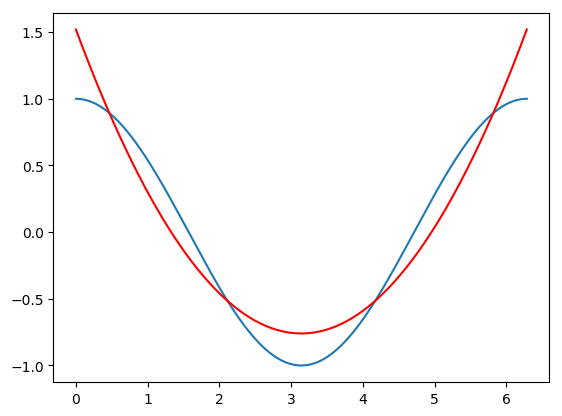

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/yunier/.julia/v0.6/Compat/src/Compat.jl:71
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/yunier/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/yunier/.julia/v0.6/Compat/src/Compat.jl:385
 [7] eventloop(::ZMQ.Socket) at /Users/yunier/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[8], in expression starting on line 6


In [8]:
c=float(csym)
using PyPlot

xx = linspace(0, 2π, 1000)

plot(xx, cos(xx))

# Evaluate p using Horner's rule
p = zeros(xx)
for i=n+1:-1:1
    p = p.*xx + c[i]
end

plot(xx, p, "r");

---

## Unique solution to the normal equations

In addition, the matrix $B$ is **symmetric** and **positive definite**. 

It is clear that $B$ is symmetric since $\ip{\phi_j}{\phi_k} = \ip{\phi_k}{\phi_j}$.

To show $B$ is positive definite, we let $c \in \mathbb{R}^{n+1}$ be nonzero, and note that 

$$c^T B c = \ip{p}{p} = \norm{p}_2^2,$$

where $p = \sum_{j=0}^n c_j \phi_j$. Since $c \neq 0$, we have that $p \neq 0$ due to the fact the functions $\phi_0,\ldots,\phi_n$ are **linearly independent**. Thus, $c^T B c = \norm{p}_2^2 > 0$.

Positive definite matrices are nonsingular, so $B$ is nonsingular.

The proof is easy. Suppose that $B$ is singular. Then there is a nonzero vector $c$ such that $Bc = 0$. Then we have

$$c^T B c = 0,$$

which contradicts the fact that $B$ is positive definite. Thus $B$ must be nonsingular.

Thus, there is a **unique solution** $c^*$ to the normal equations.

## Unique global minimizer

Let $\Delta c \in \mathbb{R}^{n+1}$ be nonzero. Then,

$$
\begin{align}
E_2(c^* + \Delta c) 
&=  (c^* + \Delta c)^T B (c^* + \Delta c) - 2b^T (c^* + \Delta c) + \ip{f}{f}\\
&=  \paren{c^*}^T B c^* + 2\paren{\Delta c}^T B c^* +  \paren{\Delta c}^T B \Delta c - 2b^T c^* - 2b^T \Delta c + \ip{f}{f}\\
&= E_2(c^*) + 2\paren{\Delta c}^T \paren{B c^* - b} +  \paren{\Delta c}^T B \Delta c \\
&= E_2(c^*) +  \paren{\Delta c}^T B \Delta c \\
&> E_2(c^*). \\
\end{align}
$$

Therefore, $E_2(c^*) < E_2(c^* + \Delta c)$, for all $\Delta c \neq 0$, which implies that $c^*$ is the **unique global minimizer**.

## Orthogonal projection

Geometrically, $p = \sum_{j=0}^n c_j^* \phi_j$ is the **orthogonal projection** of $f$ onto $\span \set{\phi_0,\ldots,\phi_n}$.

We can see this by noting that the **residual function** $r = f - p$ is orthogonal every to basis vector $\phi_i$:

$$
\begin{align}
\ip{r}{\phi_i} 
&= \ip{f-p}{\phi_i} \\
& = \ip{f}{\phi_i} - \ip{p}{\phi_i}\\
& = b_i - \ip{\sum_{j=0}^n c_j^* \phi_j}{\phi_i}\\
& = b_i - \sum_{j=0}^n c_j^* \ip{\phi_j}{\phi_i}\\
& = b_i - \sum_{j=0}^n c_j^* B_{ij}\\
& = b_i - \paren{B c^*}_i\\
& = 0,\\
\end{align}
$$

since $B c^* = b$. 

Indeed, the normal equations can be interpreted as $\ip{f-p}{\phi_i} = 0$, for $i=0,\ldots,n$.

Therefore, $r = f - p$ is orthogonal to the whole space $\span\set{\phi_0,\ldots,\phi_n}$, and we conclude that $p$ is the orthogonal projection of $f$ onto $\span\set{\phi_0,\ldots,\phi_n}$.

---

## Pros and cons of using the monomial basis for continuous least squares

### Pros:

1. Simple. Over the interval $[a,b]$, we have:

   $$B_{ij} = \frac{(b-a)^{i+j+1}}{i+j+1}, \quad i,j = 0,\ldots,n.$$

   Thus, $B$ is easy to evaluate. When $[a,b] = [0,1]$, we have the famous **[Hilbert matrix](http://en.wikipedia.org/wiki/Hilbert_matrix)**:

  $$B = H_{n+1} =
  \begin{bmatrix}
  1 & \frac12 & \cdots & \frac{1}{n+1} \\
  \frac12 & \frac13 & \cdots & \frac{1}{n+2} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{1}{n+1} & \frac{1}{n+2} & \cdots & \frac{1}{2n + 1}\\
  \end{bmatrix}.
  $$

### Cons:

1. Solving $B c = b$ can be expensive for large $n$.

2. The matrix $B$ is highly **ill-conditioned** which means that the computed solution $c$ is highly sensitive to errors in the right-hand-side vector $b$ and to the round-off errors that occur during the computation.


---